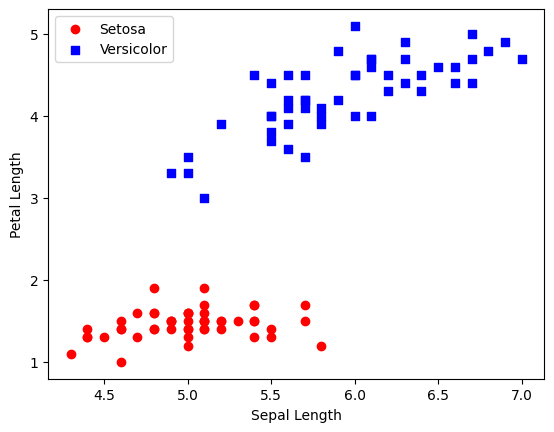

In [4]:
import numpy as np
import pandas as pd
import os 
from matplotlib import pyplot as plt

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding = 'utf-8')

y = df.iloc[0:100, 4].values 
y = np.where(y == 'Iris-setosa', 0, 1)

X = df.iloc[0:100, [0, 2]].values 

plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 's', label = 'Versicolor')

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(loc = 'upper left')


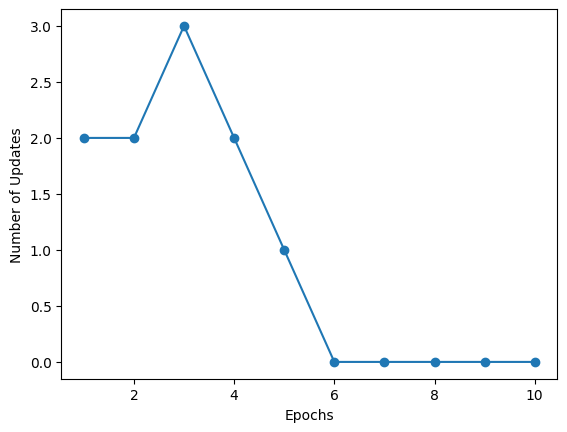

In [6]:

from perceptron import Perceptron 
ppn = Perceptron(eta = 0.1,
                 n_iter = 10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_)+ 1), 
        ppn.errors_, marker='o')

plt.xlabel("Epochs")
plt.ylabel("Number of Updates")

plt.show()


As we can see, Perceptron converged after 6 epochs

Let's visualize the prediction now:

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02): 
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot decision surfance
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    lab = lab.reshape(xx1.shape)

    plt.contour(xx1, xx2, lab, alpha=0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #plot class examples 
    for idx, cl in enumerate(np.unique(y)): 
        plt.scatter(x = X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolors='black')


In [10]:
plot_decision_regions(X, y, classifier=ppn)

AttributeError: module 'numpy' has no attribute 'arrange'